In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
from langchain_huggingface import HuggingFacePipeline,ChatHuggingFace

In [ ]:
# Pytorch is required for HuggingFacePipeline
hg_model = HuggingFacePipeline.from_model_id(
    model_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task="text-generation",
    pipeline_kwargs=dict(
        temperature=0,
        max_new_tokens=200
    )
)
hg_llm = ChatHuggingFace(llm=hg_model)
hg_llm.invoke("Are you awake?")

In [2]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

d:\genai_learn\gen-ai-basics\.virtualenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
res = embeddings.embed_query("I am Narendra")
type(res),len(res),str(res)

In [ ]:
documents = [
    "Delhi is the capital of India",
    "Kolkata is the capital of West Bengal",
    "Paris is the capital of France"
]
res = embeddings.embed_documents(documents)
type(res),len(res),str(res)

In [9]:
documents = [
    "Virat Kohli is an Indian cricketer known for his aggressive batting and leadership.",
    "MS Dhoni is a former Indian captain famous for his calm demeanor and finishing skills.",
    "Sachin Tendulkar, also known as the 'God of Cricket', holds many batting records.",
    "Rohit Sharma is known for his elegant batting and record-breaking double centuries.",
    "Jasprit Bumrah is an Indian fast bowler known for his unorthodox action and yorkers."
] #knowledge base

In [10]:
query = "Tell me about Rohit"

In [11]:
docs_embeds = embeddings.embed_documents(documents)
query_embed = embeddings.embed_query(query)


In [24]:
from sklearn.metrics.pairwise import cosine_similarity
res = cosine_similarity([query_embed],docs_embeds)[0]
res

array([0.29276189, 0.16407787, 0.2514464 , 0.53085909, 0.32676779])

In [26]:
s = sorted(list(enumerate(res)),key=lambda x:x[1],reverse=True)
s

[(3, np.float64(0.5308590910999471)),
 (4, np.float64(0.32676778852080407)),
 (0, np.float64(0.29276189292950805)),
 (2, np.float64(0.25144639793781476)),
 (1, np.float64(0.164077871662075))]

In [27]:
index,score = s[0]
documents[index]

'Rohit Sharma is known for his elegant batting and record-breaking double centuries.'

# PROMPTS

In [28]:
from langchain.prompts import PromptTemplate

In [31]:
prompt = PromptTemplate(
    name="Research Paper Summary Generation",
    template="""
Please summarize the research paper titled "{paper_input}" with the following specifications:
Explanation Style: {style_input}
Explanation Length: {length_input}
1. Mathematical Details:
   - Include relevant mathematical equations if present in the paper.
   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.
2. Analogies:
   - Use relatable analogies to simplify complex ideas.
If certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.
Ensure the summary is clear, accurate, and aligned with the provided style and length.
""",
input_variables=['paper_input','style_input','length_input'],
validate_template=True
)
prompt.save("Research_Paper.Prompt.json")

In [36]:
from langchain.prompts import load_prompt
template = load_prompt("Research_Paper.Prompt.json")
print(template)

name='Research Paper Summary Generation' input_variables=['length_input', 'paper_input', 'style_input'] input_types={} partial_variables={} template='\nPlease summarize the research paper titled "{paper_input}" with the following specifications:\nExplanation Style: {style_input}\nExplanation Length: {length_input}\n1. Mathematical Details:\n   - Include relevant mathematical equations if present in the paper.\n   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.\n2. Analogies:\n   - Use relatable analogies to simplify complex ideas.\nIf certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.\nEnsure the summary is clear, accurate, and aligned with the provided style and length.\n' validate_template=True


In [37]:
print(template.template)


Please summarize the research paper titled "{paper_input}" with the following specifications:
Explanation Style: {style_input}
Explanation Length: {length_input}
1. Mathematical Details:
   - Include relevant mathematical equations if present in the paper.
   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.
2. Analogies:
   - Use relatable analogies to simplify complex ideas.
If certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.
Ensure the summary is clear, accurate, and aligned with the provided style and length.



In [38]:
# Above way will check wrongs in prompt during compile itself
# Prompt is reusable as it is in seperate file
# Withing langchain eco system (tightly coupled)

In [39]:
input = {"paper_input":"Attention is all you need",
         "style_input":"easy",
         "length_input":"medium"}
prompt=template.invoke(input)
prompt


StringPromptValue(text='\nPlease summarize the research paper titled "Attention is all you need" with the following specifications:\nExplanation Style: easy\nExplanation Length: medium\n1. Mathematical Details:\n   - Include relevant mathematical equations if present in the paper.\n   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.\n2. Analogies:\n   - Use relatable analogies to simplify complex ideas.\nIf certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.\nEnsure the summary is clear, accurate, and aligned with the provided style and length.\n')

In [40]:
print(prompt.text)


Please summarize the research paper titled "Attention is all you need" with the following specifications:
Explanation Style: easy
Explanation Length: medium
1. Mathematical Details:
   - Include relevant mathematical equations if present in the paper.
   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.
2. Analogies:
   - Use relatable analogies to simplify complex ideas.
If certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.
Ensure the summary is clear, accurate, and aligned with the provided style and length.



In [42]:
response = hg_llm.invoke(prompt).content
print(response)

c:\Users\Narendra\anaconda3\envs\genai\Lib\site-packages\transformers\generation\configuration_utils.py:631: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


<|user|>

Please summarize the research paper titled "Attention is all you need" with the following specifications:
Explanation Style: easy
Explanation Length: medium
1. Mathematical Details:
   - Include relevant mathematical equations if present in the paper.
   - Explain the mathematical concepts using simple, intuitive code snippets where applicable.
2. Analogies:
   - Use relatable analogies to simplify complex ideas.
If certain information is not available in the paper, respond with: "Insufficient information available" instead of guessing.
Ensure the summary is clear, accurate, and aligned with the provided style and length.
</s>
<|assistant|>
The research paper titled "Attention is all you need" provides a comprehensive explanation of the concept of attention, including its importance in human cognition and the role of attention in various cognitive processes. The paper uses simple, intuitive code snippets to explain the mathematical concepts involved in attention. The summary 

In [2]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="Llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001F5EB2D57C0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001F5EB2D6900>, model_name='Llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
response = llm.invoke(prompt)
response

In [45]:
print(response.content)

"Attention is All You Need" is a research paper published in 2017 by Vaswani et al. that introduced the Transformer model, a groundbreaking architecture for natural language processing (NLP) tasks. Here's a summary of the paper, written in an easy-to-understand style with medium-length explanations and analogies.

**Background**
Traditional recurrent neural networks (RNNs) and long short-term memory (LSTM) networks have been the cornerstone of NLP tasks, such as machine translation, text classification, and language modeling. However, these models have limitations, like sequential processing and recurrent dependencies, which can lead to slow training times and poor performance.

**The Problem**
The authors identified the main issue with traditional RNNs: they rely on sequential processing, which means the model processes one input element at a time, in sequence. This sequential processing can lead to:

1. **Vanishing gradients**: The gradients used to update the model's weights can bec

# MESSAGES

In [3]:
while True:
    instruction = input()
    print("Human: ",instruction)
    if instruction == 'exit':
        break
    else:
        print("AI: ",llm.invoke(instruction).content)

Human:  Hi, I am Narendra
AI:  Nice to meet you, Narendra! Is there something I can help you with or would you like to chat?
Human:  How is wheather today?
AI:  I'm just an AI, I don't have real-time access to current weather conditions. However, I can suggest some ways for you to find out the current weather:

1. Check your local news website or app: Many news websites and apps provide up-to-date weather forecasts and conditions for your area.
2. Use a weather app: There are many weather apps available that provide current weather conditions, forecasts, and radar imagery. Some popular options include Dark Sky, Weather Underground, and The Weather Channel.
3. Check your local weather service: The National Weather Service (NWS) provides current weather conditions, forecasts, and warnings for the United States and its territories. You can visit their website or mobile app to get the latest information.
4. Look out the window: Sometimes the easiest way to find out the current weather is t

In [5]:
history = []
while True:
    instruction = input()
    print("Human: ",instruction)
    history.append(instruction)
    if instruction == 'exit':
        break
    else:
        res = llm.invoke(history).content
        print("AI: ",res)
        history.append(res)

Human:  Hello, I am Narendra
AI:  Hello Narendra! It's nice to meet you. Is there something I can help you with or would you like to chat?
Human:  How is whether today?
AI:  I think you meant "weather"! As a digital AI assistant, I don't have a physical presence, so I don't experience the weather. But I'd be happy to chat with you about the weather in your area or discuss other topics! How about you, how's the weather where you are?
Human:  I forgot my name! Can you help?
AI:  Don't worry, it happens to the best of us! You told me earlier that your name is Narendra, remember?
Human:  thanks
AI:  You're welcome! It's always reassuring to have a reminder, and I'm glad I could help. Now, where were we? We were discussing the weather, or we could start a new topic altogether. What's on your mind?
Human:  exit


In [6]:
history

['Hello, I am Narendra',
 "Hello Narendra! It's nice to meet you. Is there something I can help you with or would you like to chat?",
 'How is whether today?',
 'I think you meant "weather"! As a digital AI assistant, I don\'t have a physical presence, so I don\'t experience the weather. But I\'d be happy to chat with you about the weather in your area or discuss other topics! How about you, how\'s the weather where you are?',
 'I forgot my name! Can you help?',
 "Don't worry, it happens to the best of us! You told me earlier that your name is Narendra, remember?",
 'thanks',
 "You're welcome! It's always reassuring to have a reminder, and I'm glad I could help. Now, where were we? We were discussing the weather, or we could start a new topic altogether. What's on your mind?",
 'exit']

In [3]:
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage

In [ ]:
chat_history = []
chat_history.append(SystemMessage(content = "You are helpful agent"))
while True:
    instruction = input()
    print("Human: ",instruction)
    chat_history.append(HumanMessage(content=instruction))
    if instruction == 'exit':
        break
    else:
        response = llm.invoke(chat_history)
        print("AI :",response.content)
        chat_history.append(response)
        
    

Human:  Hi, I am Narendra , 30 years old
AI : content="Nice to meet you, Narendra! It's great to have you here. As a helpful agent, I'm here to assist you with any questions or concerns you may have. What brings you to this conversation today? Is there something specific you'd like to talk about or ask?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 29, 'total_tokens': 86, 'completion_time': 0.0475, 'prompt_time': 0.004374686, 'queue_time': 0.084924361, 'total_time': 0.051874686}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None} id='run--803011c6-5018-4015-905d-6f3d7919b731-0' usage_metadata={'input_tokens': 29, 'output_tokens': 57, 'total_tokens': 86}
Human:  Add 10 to my age
AI : content='Your age is currently 30. If I add 10 to that, your new age would be:\n\n30 + 10 = 40\n\nSo, your new age is 40!' additional_kwargs={} response_metadata={'token_usage': {'completion_t

In [7]:
chat_history

[SystemMessage(content='You are helpful agent', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi, I am Narendra , 30 years old', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Nice to meet you, Narendra! It's great to have you here. As a helpful agent, I'm here to assist you with any questions or concerns you may have. What brings you to this conversation today? Is there something specific you'd like to talk about or ask?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 29, 'total_tokens': 86, 'completion_time': 0.0475, 'prompt_time': 0.004374686, 'queue_time': 0.084924361, 'total_time': 0.051874686}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None}, id='run--803011c6-5018-4015-905d-6f3d7919b731-0', usage_metadata={'input_tokens': 29, 'output_tokens': 57, 'total_tokens': 86}),
 HumanMessage(content='Add 10 to my age', additional_kw

In [9]:
#ChatPromptTemplate  - To pass multiple dynamic values to messages
from langchain.prompts import ChatPromptTemplate
template = ChatPromptTemplate([
    ('system','You are very good in {domain} domain'),
    ('human','Explain me {input} in simple way')
])
prompt = template.invoke({
    'domain':'poetry',
    'input':'3 multiplication table upto 10 times'
})
res = llm.invoke(prompt).content
print(res)

What a delightful request! Here's a poetic attempt to explain the multiplication tables up to 10 times:

**Table of 2**

When two apples are paired, they become four,
Double the fun, and the number's galore!
2 x 2 = 4, so easy to see,
A simple math fact, for you and me.

**Table of 3**

Here comes three, with a charm so bright,
When multiplied by two, it's a delightful sight!
3 x 2 = 6, don't you agree,
A math fact so easy, for you and me!

**Table of 4**

Now we have four, with a rhythm so neat,
When multiplied by three, it's a treat to repeat!
4 x 3 = 12, don't you see,
A math fact so simple, for you and me!

I hope these little poems helped make the multiplication tables more memorable for you!


In [10]:
chat_history

[SystemMessage(content='You are helpful agent', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi, I am Narendra , 30 years old', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Nice to meet you, Narendra! It's great to have you here. As a helpful agent, I'm here to assist you with any questions or concerns you may have. What brings you to this conversation today? Is there something specific you'd like to talk about or ask?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 29, 'total_tokens': 86, 'completion_time': 0.0475, 'prompt_time': 0.004374686, 'queue_time': 0.084924361, 'total_time': 0.051874686}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None}, id='run--803011c6-5018-4015-905d-6f3d7919b731-0', usage_metadata={'input_tokens': 29, 'output_tokens': 57, 'total_tokens': 86}),
 HumanMessage(content='Add 10 to my age', additional_kw

In [12]:
# MessagePlaceholder - For future reference
from langchain.prompts import MessagesPlaceholder
template = ChatPromptTemplate([
    MessagesPlaceholder(variable_name='chat_history'),
    ('human','{query}')
])

In [14]:
prompt = template.invoke({'chat_history':chat_history,'query':"Tell me My name and multiply my age by 2"})
prompt

ChatPromptValue(messages=[SystemMessage(content='You are helpful agent', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi, I am Narendra , 30 years old', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Narendra! It's great to have you here. As a helpful agent, I'm here to assist you with any questions or concerns you may have. What brings you to this conversation today? Is there something specific you'd like to talk about or ask?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 29, 'total_tokens': 86, 'completion_time': 0.0475, 'prompt_time': 0.004374686, 'queue_time': 0.084924361, 'total_time': 0.051874686}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None}, id='run--803011c6-5018-4015-905d-6f3d7919b731-0', usage_metadata={'input_tokens': 29, 'output_tokens': 57, 'total_tokens': 86}), HumanMessage(content='Add 10 to 

In [15]:
llm.invoke(prompt)

AIMessage(content='I remember! Your name is Narendra, and according to our previous conversation, your age is 40.\n\nIf I multiply your age by 2, I get:\n\n40 x 2 = 80\n\nSo, your name is Narendra, and your age multiplied by 2 is 80!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 214, 'total_tokens': 274, 'completion_time': 0.05, 'prompt_time': 0.027228506, 'queue_time': 0.067126847, 'total_time': 0.077228506}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run--db858cea-4e68-4d58-a765-89625eb12bca-0', usage_metadata={'input_tokens': 214, 'output_tokens': 60, 'total_tokens': 274})

# STRUCTURED OUTPUT

In [18]:
from typing import TypedDict # Instruct the type does not enforce rule
class Student(TypedDict):
    name:str
    age:int


In [20]:
s1 = Student(name="John",age=20)
s1

{'name': 'John', 'age': 20}

In [22]:
s2 = Student(name="Narendra",age="Thirty") 
s2 # It wont validates just informs

{'name': 'Narendra', 'age': 'Thirty'}

In [23]:
class Review(TypedDict):
    summary:str
    sentiment:str

In [24]:
str_llm = llm.with_structured_output(Review)
str_llm.invoke("Hardware is great, but software and UI is outdated. And i cannot delete pre installed apps")

{'sentiment': 'outdated',
 'summary': 'hardware is great, but software and UI is outdated. And i cannot delete pre installed apps'}

In [29]:
from typing import Annotated,Optional,Literal
class Review(TypedDict):
    key_features: Annotated[list[str], "Describe the key features of product"]
    pros: Annotated[Optional[list[str]],"Pros of product"]
    cons: Annotated[Optional[list[str]],"Cons of product"]
    sentiment:Annotated[Literal["Positive","Negative","Neutral"],"Sentiment of Review"]

review_llm = llm.with_structured_output(Review)
review1 = "I’ve been using this phone for a few weeks, and it has exceeded my expectations. The display is vibrant and sharp, making videos and games look fantastic. Battery life easily lasts a full day even with heavy use, and the fast charging is a game changer. The camera produces crisp, detailed photos even in low light, and the performance is smooth with no lag, thanks to the powerful processor. The design feels premium and comfortable in hand. Overall, it offers excellent value for the price, and I’d highly recommend it to anyone looking for a reliable and feature-packed smartphone."
response = review_llm.invoke(review1)
response

{'cons': ['Nothing major'],
 'key_features': ['Vibrant and sharp display',
  'Long battery life',
  'Fast charging',
  'Excellent camera',
  'Smooth performance'],
 'pros': ['Display is vibrant and sharp',
  'Battery life is long',
  'Fast charging is convenient',
  'Camera produces crisp photos',
  'Performance is smooth'],
 'sentiment': 'Positive'}

In [26]:
type(response)

dict

In [27]:
review2 = "I was excited to try this phone, but it has been disappointing. The battery drains quickly, requiring multiple charges throughout the day, and the device gets noticeably hot during use. The camera struggles in anything but perfect lighting, with grainy and washed-out photos. I’ve also experienced frequent app crashes and sluggish performance, especially when multitasking. The build quality feels cheap, and the phone is bulkier than expected. Connectivity issues with Wi-Fi and Bluetooth are a recurring frustration. For the price, I expected much better reliability and performance. I wouldn’t recommend this phone unless major improvements are made."
review_llm.invoke(review2)

{'cons': ['The battery drains quickly, requiring multiple charges throughout the day'],
 'key_features': ['Build quality feels cheap'],
 'pros': ['none'],
 'sentiment': 'Negative'}

In [28]:
review3 = "This phone delivers a generally acceptable experience but doesn’t stand out. The screen is decent, offering clear visuals, though brightness could be better outdoors. Battery life is average, lasting a day with moderate use, and performance is fine for everyday tasks but not ideal for heavy gaming or multitasking. The camera is good in daylight but underwhelms in low light. The design is simple and functional, though it feels a bit plain compared to competitors. It’s neither exceptional nor terrible—just a solid mid-range option. It might suit users who don’t need cutting-edge features but want a reliable daily driver."
review_llm.invoke(review3)

{'cons': ['The screen is decent, but brightness could be better outdoors'],
 'key_features': ['Decent screen',
  'Average battery life',
  'Fine performance',
  'Good camera in daylight',
  'Simple and functional design'],
 'pros': ['Clear visuals',
  'Lasts a day with moderate use',
  'Good for everyday tasks'],
 'sentiment': 'Neutral'}

In [30]:
from pydantic import BaseModel
class Student(BaseModel):
    name:str
    age:int

In [ ]:
s1 = Student(name="Narendra",age="thirty")  # Validation Error

In [38]:
from pydantic import EmailStr
class Student(BaseModel):
    name:str = "Narendra"
    age:Optional[int] = None
    email: EmailStr
    

In [ ]:
new_student = {'email':'xyz'}
s1 = Student(**new_student) #Validation Fail

In [41]:
s1 = Student(email="nare@gamil.com")
s1

Student(name='Narendra', age=None, email='nare@gamil.com')

In [43]:
from pydantic import Field

class Student(BaseModel):
    name: str = Field(description="Student Name")
    age: int = Field(gt=18,default=18,description="Age of student",)

In [ ]:
s1 = {'name':'ravi','age':10}
Student(**s1) # validation Error

In [45]:
Student(name="Narendra")

Student(name='Narendra', age=18)

In [46]:
class Review(BaseModel):

    key_themes: list[str] = Field(description="Write down all the key themes discussed in the review in a list")
    summary: str = Field(description="A brief summary of the review")
    sentiment: Literal["pos", "neg"] = Field(description="Return sentiment of the review either negative, positive or neutral")
    pros: Optional[list[str]] = Field(default=None, description="Write down all the pros inside a list")
    cons: Optional[list[str]] = Field(default=None, description="Write down all the cons inside a list")
    name: Optional[str] = Field(default=None, description="Write the name of the reviewer")

In [47]:
class Address(BaseModel):
    city:str = Field(default="Hyderabad",description="City Name")
    own_house:bool = Field(description="Are you staying in own house?")
    pincode:int = Field(gt=100000,lt=999999,description="Pincode of address")


In [48]:
class Person(BaseModel):
    name:str = Field(description="Person Name")
    address: Address = Field(description="Person Address")

In [49]:
p1 = {'name':'Narendra','address':{'own_house':True,'pincode':560036}}
Person(**p1)

Person(name='Narendra', address=Address(city='Hyderabad', own_house=True, pincode=560036))

In [53]:
Person.model_fields

{'name': FieldInfo(annotation=str, required=True, description='Person Name'),
 'address': FieldInfo(annotation=Address, required=True, description='Person Address')}

In [ ]:
#JSON Structure Defination
sample_json = {
    "title":"Review",
    "type":"object",
    "properties":{
        "summary": {
            "type":"string",
            "description":"summary of review"
        },
        "key_features":{
            "type":"array",
            "items":{
                "type":"string"
            },
            "description":"Key features listed in review"
        },
        "sentiment":{
            "type":"string",
            "enum":["+ve","-ve"],
            "description":"sentiment of review"
        }
    },
    "required":["summary","key_features","sentiment"]
}

In [55]:
json_llm = llm.with_structured_output(sample_json)
json_llm.invoke(review1)

{'summary': 'The phone has exceeded my expectations with a vibrant display, long battery life, and a powerful processor.',
 'key_features': ['vibrant display',
  'long battery life',
  'powerful processor'],
 'sentiment': '+ve'}

# OUTPUT PARSERS

In [58]:
from langchain_core.output_parsers import StrOutputParser
query = "Who is CSK team captain?"
llm.invoke(query)

AIMessage(content='The captain of the Chennai Super Kings (CSK) team in the Indian Premier League (IPL) is MS Dhoni.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 17, 'total_tokens': 44, 'completion_time': 0.0225, 'prompt_time': 0.00260213, 'queue_time': 0.066932267, 'total_time': 0.02510213}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None}, id='run--c32ba12b-eea0-4d49-a127-d3249375a88d-0', usage_metadata={'input_tokens': 17, 'output_tokens': 27, 'total_tokens': 44})

In [59]:
parser = StrOutputParser()
chain = llm | parser
chain.invoke(query)

'The captain of the Chennai Super Kings (CSK) team in the Indian Premier League (IPL) is MS Dhoni.'

In [64]:
from langchain_core.output_parsers import JsonOutputParser
from langchain.prompts import PromptTemplate
js_parser = JsonOutputParser()
tempalte1 = PromptTemplate(template="Give me name ,age and city of fictional person.\n{format_instrctions}",
                          input_variables=[],partial_variables={
                              'format_instrctions':js_parser.get_format_instructions()
                          })
chain = tempalte1 | llm | js_parser
chain.invoke({})


{'name': 'Evelyn Stone', 'age': 32, 'city': 'San Francisco'}

In [65]:
chain.invoke({})

{'name': 'Emily Rodriguez', 'age': 32, 'city': 'Portland'}

In [67]:
chain = tempalte1 | llm 
res = chain.invoke({}).content
res

'Here is a fictional person:\n\n```\n{\n  "name": "Ava Morales",\n  "age": 32,\n  "city": "San Francisco"\n}\n```\n\nLet me know if you\'d like me to generate a new one!'

In [68]:
js_parser.invoke(res)

{'name': 'Ava Morales', 'age': 32, 'city': 'San Francisco'}

In [76]:
from langchain.output_parsers import StructuredOutputParser,ResponseSchema
schema = [ResponseSchema(name='Fact 1',description="Fact 1 details"),
          ResponseSchema(name="Fact 2",description="Fact 2 details")]

In [77]:
struct_parse = StructuredOutputParser.from_response_schemas(schema)

In [78]:
template = PromptTemplate(
    template='Give 2 fact about {topic} \n {format_instruction}',
    input_variables=['topic'],
    partial_variables={'format_instruction':struct_parse.get_format_instructions()}
)

In [79]:
chain = template | llm 
res=chain.invoke({'topic':'Gen AI'})

In [80]:
res

AIMessage(content='Here are two facts about Gen AI:\n\n```json\n{\n  "Fact 1": "Gen AI is a type of artificial general intelligence (AGI) that aims to provide a highly advanced level of intelligence, capable of understanding and performing any intellectual task that a human can.",\n  "Fact 2": "Gen AI is still in its infancy, with researchers and developers working to overcome the challenges of creating a truly general-purpose AI, including the need for vast amounts of data, complex algorithms, and robust testing and validation processes."\n}\n```', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 79, 'total_tokens': 189, 'completion_time': 0.091666667, 'prompt_time': 0.015206368, 'queue_time': 0.5548987550000001, 'total_time': 0.106873035}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_dadc9d6142', 'finish_reason': 'stop', 'logprobs': None}, id='run--cfb2089c-6b6d-46e6-a15a-87770f1d19ac-0', usage_metadata={'input_tokens': 

In [81]:
struct_parse.invoke(res)

{'Fact 1': 'Gen AI is a type of artificial general intelligence (AGI) that aims to provide a highly advanced level of intelligence, capable of understanding and performing any intellectual task that a human can.',
 'Fact 2': 'Gen AI is still in its infancy, with researchers and developers working to overcome the challenges of creating a truly general-purpose AI, including the need for vast amounts of data, complex algorithms, and robust testing and validation processes.'}

In [82]:
chain = template | llm | struct_parse
chain.invoke({'topic':'India GDP'})

{'Fact 1': "As of 2021, India's nominal GDP stands at over $3 trillion, making it the fifth-largest economy in the world.",
 'Fact 2': "According to the World Bank, India's GDP growth rate was around 7.3% in 2021, making it one of the fastest-growing major economies in the world."}

In [117]:
from langchain_core.output_parsers import PydanticOutputParser
class Review(BaseModel):

    name: str = Field(description='Reviewer Name')
    age: int = Field(gt=18, description='Age of the reviewer')
    summary: list[str] = Field(description='review summary')
    sentiment: Literal['+ve','-ve'] = Field(description="Sentiment of review")

parser = PydanticOutputParser(pydantic_object=Review)

In [118]:
template = PromptTemplate(
    template = "Give me some imaginary review.\n{format_instuctions}",
    input_variables=[],
    partial_variables={'format_instuctions':parser.get_format_instructions()}
)

In [122]:
chain = template | llm 
res = chain.invoke({})
res

AIMessage(content='Here are 5 imaginary reviews in JSON format, conforming to the given schema:\n\nReview 1:\n```\n{\n  "name": "John Doe",\n  "age": 25,\n  "summary": ["The product is amazing! The design is sleek and the quality is top notch."],\n  "sentiment": "+ve"\n}\n```\n\nReview 2:\n```\n{\n  "name": "Jane Smith",\n  "age": 30,\n  "summary": ["This product is a total waste of money. It doesn\'t work as advertised."],\n  "sentiment": "-ve"\n}\n```\n\nReview 3:\n```\n{\n  "name": "Bob Johnson",\n  "age": 28,\n  "summary": ["The product is okay, but it\'s not as good as the competition."],\n  "sentiment": "+ve"\n}\n```\n\nReview 4:\n```\n{\n  "name": "Alice Brown",\n  "age": 22,\n  "summary": ["I love this product! It\'s lightweight and easy to use."],\n  "sentiment": "+ve"\n}\n```\n\nReview 5:\n```\n{\n  "name": "Michael Davis",\n  "age": 35,\n  "summary": ["This product is a total disappointment. The customer service is terrible."],\n  "sentiment": "-ve"\n}\n```', additional_kwar

In [121]:
parser.invoke(res)

Review(name='John Doe', age=25, summary=['This product is amazing!', 'The customer service was top-notch'], sentiment='+ve')

In [ ]:
chain = template | llm | parser
chain.invoke({})

Review(name='John Doe', age=25, summary=['The product is amazing', 'The customer service is top-notch'], sentiment='+ve')

In [87]:
chain.get_graph().print_ascii()

    +-------------+      
    | PromptInput |      
    +-------------+      
            *            
            *            
            *            
   +----------------+    
   | PromptTemplate |    
   +----------------+    
            *            
            *            
            *            
      +----------+       
      | ChatGroq |       
      +----------+       
            *            
            *            
            *            
+----------------------+ 
| PydanticOutputParser | 
+----------------------+ 
            *            
            *            
            *            
       +--------+        
       | Review |        
       +--------+        


# RUNNABLE

In [2]:
from langchain.schema.runnable import RunnableParallel,RunnableBranch,RunnablePassthrough,RunnableSequence,RunnableLambda

In [93]:
prompt1 = PromptTemplate(template="Give Pros of {topic}",input_variables=['topic'])
prompt2 = PromptTemplate(template="Give Cons of {topic}",input_variables=['topic'])
prompt3 = PromptTemplate(template="Create final report using {pros} and {cons}",
                         input_variables=['pros','cons'])


In [97]:
str_parser = StrOutputParser()
paralel_chain = RunnableParallel({
    'pros': prompt1 | llm | str_parser,
    'cons': prompt2 | llm | str_parser
})
final_chain = paralel_chain| prompt3 | llm | str_parser
final_chain.get_graph().print_ascii()

           +--------------------------+            
           | Parallel<pros,cons>Input |            
           +--------------------------+            
                ***             ***                
              **                   **              
            **                       **            
+----------------+              +----------------+ 
| PromptTemplate |              | PromptTemplate | 
+----------------+              +----------------+ 
          *                             *          
          *                             *          
          *                             *          
    +----------+                  +----------+     
    | ChatGroq |                  | ChatGroq |     
    +----------+                  +----------+     
          *                             *          
          *                             *          
          *                             *          
+-----------------+            +-----------------+ 
| StrOutputP

In [98]:
paralel_chain.invoke({'topic':'Iphone Mobiles'})

{'pros': "Here are some pros of iPhone mobiles:\n\n1. **Ease of Use**: iPhones are known for their user-friendly interface and simplicity, making them easy to use for people of all ages and technical backgrounds.\n2. **Ecosystem**: iPhone integrates seamlessly with other Apple devices and services, such as Macs, iPads, Apple Watches, and Apple TVs, allowing for easy sharing and transfer of files, photos, and more.\n3. **Security**: iPhones have a reputation for being highly secure, thanks to their closed system and strict app review process, which helps protect users from malware and other security threats.\n4. **App Store**: The App Store offers a wide selection of high-quality apps, with many exclusive to iOS, including popular games, productivity tools, and social media apps.\n5. **Camera**: iPhones are known for their high-quality cameras, with advanced features like portrait mode, night mode, and video recording capabilities.\n6. **Design and Build Quality**: iPhones have a reputa

In [102]:
res = final_chain.invoke({'topic':'Iphone Mobiles'})
print(res)

**Final Report: Analyzing the Pros and Cons of iPhone Mobiles**

Introduction:

Apple's iPhone has been a dominant force in the smartphone market for over a decade, with millions of users worldwide. While the iPhone has many strengths, it also has some weaknesses. This report aims to provide an in-depth analysis of the pros and cons of iPhone mobiles, highlighting their advantages and disadvantages.

**Pros:**

1. **Ease of use**: iPhones are generally easy to use, with an intuitive interface and a seamless user experience.
2. **Ecosystem**: iPhone's ecosystem is highly integrated with other Apple devices and services, making it easy to share files, photos, and music across devices.
3. **Security**: iPhones have a reputation for being highly secure, thanks to their closed system and regular updates to fix vulnerabilities.
4. **App store**: The App Store has a wide selection of high-quality apps, and developers often release iOS versions of their apps first.
5. **Design and build qualit

In [12]:
from pydantic import BaseModel,Field
from typing import Literal
from langchain_core.output_parsers import PydanticOutputParser,StrOutputParser
from langchain.prompts import PromptTemplate

In [13]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="Llama3-8b-8192")

In [14]:
class Review(BaseModel):
    sentiment: Literal['+ve','-ve'] = Field(description="Sentiment of review")
    
    

In [15]:
review_sentiment = PydanticOutputParser(pydantic_object=Review)
prompt = PromptTemplate(
    template = "What is sentiment of {question} .\n{format_ins}",
    input_variables=['question'],
    partial_variables={'format_ins':review_sentiment.get_format_instructions()}
)

In [16]:
prompt

PromptTemplate(input_variables=['question'], input_types={}, partial_variables={'format_ins': 'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"sentiment": {"description": "Sentiment of review", "enum": ["+ve", "-ve"], "title": "Sentiment", "type": "string"}}, "required": ["sentiment"]}\n```'}, template='What is sentiment of {question} .\n{format_ins}')

In [37]:
positive_reply = PromptTemplate(template="Reply meaningfully for positive review. {sentiment}",input_variables=['sentiment']) # We have to have dynamic here so that it gets something from earlier
negative_reply = PromptTemplate(template="Reply meaningfully for negative sentiment. {sentiment}",input_variables=['sentiment'])

In [38]:
final_chain = RunnableBranch(
    (lambda x:x.sentiment == '+ve',RunnableSequence(positive_reply,llm,StrOutputParser())),
    (lambda x:x.sentiment == '-ve',RunnableSequence(negative_reply,llm,StrOutputParser())),
    RunnableLambda(lambda x:"I dont know sentiment here")
)
chain = prompt | llm | review_sentiment | final_chain

res = chain.invoke({"question":"You are kind person"})
print(res)


**Thank you so much for your kind words!**

I'm absolutely thrilled to receive your positive review! It truly means the world to me that you had a great experience with [Your Name/Company]. Your feedback is invaluable in helping me improve and provide the best possible service to my clients.

Your sentiment='+ve' review has put a big smile on my face, and I'm grateful for your trust and support. I'm committed to continuing to deliver exceptional [products/services] that meet and exceed your expectations.

Thank you again for taking the time to share your thoughts. Your review will help others make informed decisions and know what to expect from me. I'm honored to have earned your trust and look forward to serving you again in the future!

Best regards,
[Your Name]


In [39]:
res = chain.invoke({"question":"You are arrogant person"})
print(res)

I'm so sorry to hear that you're feeling negative. It can be really tough to deal with difficult emotions, but I want you to know that you're not alone. It's okay to feel overwhelmed and upset, and it's important to acknowledge those feelings instead of trying to push them away.

Would you like to talk about what's going on and why you're feeling this way? Sometimes sharing your thoughts and feelings with someone who cares can help you feel a little better and gain a new perspective. I'm here to listen and offer support if you need it.

Remember that you're strong and capable, and you've gotten through tough times before. You can get through this too.


In [34]:
# What is runnable?
# Each has purpose (Unit of work) (input,process,output)
# Common methods(same interface) invoke,batch,stream
# seemless connection across components to create chains
# Chains connection

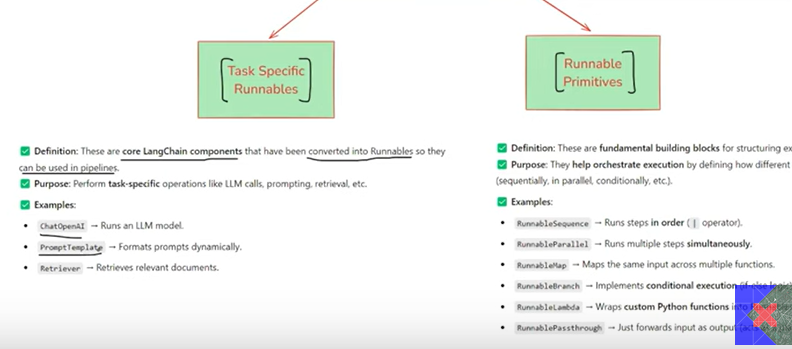

In [40]:
def word_count(info):
    return len(info.split())

In [42]:
prompt = PromptTemplate(
    template="Tell me a good joke about {topic}",
    input_variables=['topic']
    )
chain = RunnableSequence(prompt,llm,StrOutputParser())
branch = RunnableParallel({
    "text":RunnablePassthrough(),
    "length":RunnableLambda(word_count)
})
final_chain = chain | branch
res = final_chain.invoke({'topic':"Cricket"})
print(res)

{'text': "A cricket joke! Here's one:\n\nWhy did the cricketer bring a ladder to the pitch?\n\nBecause he wanted to take his game to a whole new level! (get it?)\n\nI hope that one bowled you over with laughter!", 'length': 38}


# RAG

## Document Loader

Bringing data from multiple sources and create document objects which is standardized format. Which will have page content and metadata.
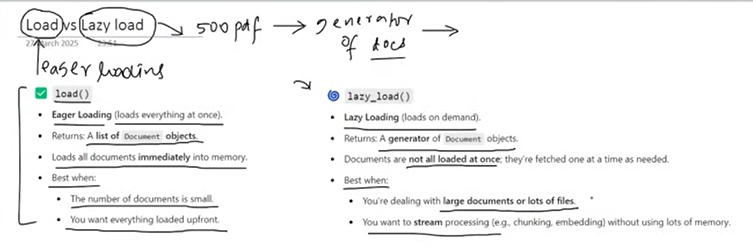

In [43]:
from langchain_community.document_loaders import TextLoader,PyPDFLoader,DirectoryLoader,WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [44]:
loader = TextLoader('data/work.txt')

In [ ]:
docs = loader.load()
docs

In [46]:
len(docs)

1

In [47]:
type(docs[0])

langchain_core.documents.base.Document

In [ ]:
docs[0].page_content

In [52]:
dir_loader = DirectoryLoader('data/',glob='*.txt',loader_cls=TextLoader)
docs = dir_loader.load()
len(docs)

2

In [ ]:
docs

In [ ]:
dir_loader = DirectoryLoader('data/',glob='*.pdf',loader_cls=PyPDFLoader) 
docs = dir_loader.load()
docs # 5 pages in shareholder PDF

In [55]:
prompt = PromptTemplate(template="Kindly answer below question based on {knowledge}\n. Question: {question}",input_variables=["knowledge","question"])
parser = StrOutputParser()
chain = prompt | llm | parser
res = chain.invoke({
    'knowledge':docs,
    'question':'What is employee count?'
})
print(res)

According to the document, the employee count is mentioned in two places:

1. On page 2 (page_label '3'):
"In 1997, we worked hard to expand our business infrastructure to support these greatly increased traffic, sales, and service levels: • Amazon.com's employee base grew from 158 to 614, and we significantly strengthened our management team."
2. On page 4 (page_label '5'):
"In 1997, our employee base grew from 158 to 614, and we significantly strengthened our management team."

So, the employee count is 614 at the end of 1997.


## TEXT SPLITTERS

In [56]:
from langchain.text_splitter import CharacterTextSplitter,RecursiveCharacterTextSplitter

In [ ]:
splitter = CharacterTextSplitter(separator=".",chunk_size=100,chunk_overlap=0)
res = splitter.split_text(docs[0].page_content)
res

In [63]:
len(res)

22

In [ ]:
result = splitter.split_documents(docs)
len(result)

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(chunk_size=100,chunk_overlap=0) 
# Here by default data is split to paragraphs first '\n\n' then sentences('\n'), then words (' ')
# and then charecters ('').
res = r_splitter.split_documents(docs)
res

In [70]:
len(res)

138

In [71]:
res[0]

Document(metadata={'producer': 'Acrobat Distiller 4.05 for Windows', 'creator': 'Microsoft Word 10.0', 'creationdate': 'D:20030410174414', 'moddate': '2003-04-10T17:45:31-07:00', 'author': 'Ace', 'title': 'To our shareholders:', 'source': 'data\\Shareholderletter97.pdf', 'total_pages': 5, 'page': 0, 'page_label': '1'}, page_content='To our shareholders:')

In [72]:
text = """
class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade  # Grade is a float (like 8.5 or 9.2)

    def get_details(self):
        return self.name"

    def is_passing(self):
        return self.grade >= 6.0


# Example usage
student1 = Student("Aarav", 20, 8.2)
print(student1.get_details())

if student1.is_passing():
    print("The student is passing.")
else:
    print("The student is not passing.")

"""

In [83]:
from langchain.text_splitter import Language
r_lang_splitter = RecursiveCharacterTextSplitter.from_language(language=Language.PYTHON,chunk_size=200,chunk_overlap=0)

In [84]:
chunks = r_lang_splitter.split_text(text)
len(chunks)

3

In [85]:
print(chunks[0])

class Student:
    def __init__(self, name, age, grade):
        self.name = name
        self.age = age
        self.grade = grade  # Grade is a float (like 8.5 or 9.2)


In [86]:
print(chunks[1])

def get_details(self):
        return self.name"

    def is_passing(self):
        return self.grade >= 6.0


# Example usage
student1 = Student("Aarav", 20, 8.2)
print(student1.get_details())


In [88]:
from langchain_huggingface import HuggingFaceEmbeddings
embeds = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

c:\Users\Narendra\anaconda3\envs\genai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [110]:
from langchain_experimental.text_splitter import SemanticChunker
splitter = SemanticChunker(
    embeds,
    # breakpoint_threshold_amount=3,
    # breakpoint_threshold_type='standard_deviation'
)

In [111]:
sample = """
Farmers were working hard in the fields, preparing the soil and planting seeds for the next season. The sun was bright, and the air smelled of earth and fresh grass. The Indian Premier League (IPL) is the biggest cricket league in the world. People all over the world watch the matches and cheer for their favourite teams.
Terrorism is a big danger to peace and safety. It causes harm to people and creates fear in cities and villages. When such attacks happen, they leave behind pain and sadness. To fight terrorism, we need strong laws, alert security forces, and support from people who care about peace and safety.
"""

In [114]:
docs = splitter.create_documents([sample])
docs

[Document(metadata={}, page_content='\nFarmers were working hard in the fields, preparing the soil and planting seeds for the next season.'),
 Document(metadata={}, page_content='The sun was bright, and the air smelled of earth and fresh grass. The Indian Premier League (IPL) is the biggest cricket league in the world. People all over the world watch the matches and cheer for their favourite teams. Terrorism is a big danger to peace and safety. It causes harm to people and creates fear in cities and villages. When such attacks happen, they leave behind pain and sadness. To fight terrorism, we need strong laws, alert security forces, and support from people who care about peace and safety. ')]

In [113]:
len(docs)

2

## VECTOR STORES

In [115]:
from langchain.vectorstores import Chroma

In [116]:
from langchain.schema import Document

# Create LangChain documents for IPL players

doc1 = Document(
        page_content="Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.",
        metadata={"team": "Royal Challengers Bangalore"}
    )
doc2 = Document(
        page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
        metadata={"team": "Mumbai Indians"}
    )
doc3 = Document(
        page_content="MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.",
        metadata={"team": "Chennai Super Kings"}
    )
doc4 = Document(
        page_content="Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.",
        metadata={"team": "Mumbai Indians"}
    )
doc5 = Document(
        page_content="Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.",
        metadata={"team": "Chennai Super Kings"}
    )


In [117]:
docs = [doc1,doc2,doc3,doc4,doc5]
store = Chroma(embedding_function=embeds,persist_directory='./chroma',collection_name='crikcet_players')

C:\Users\Narendra\AppData\Local\Temp\ipykernel_22672\2087886137.py:2: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  store = Chroma(embedding_function=embeds,persist_directory='./chroma',collection_name='crikcet_players')


In [118]:
store.add_documents(docs)

['2b5050c2-9ecc-4db1-9ff1-eae23e452d40',
 'f9e1f120-07fb-4c81-beb6-85b15d472c20',
 '00b9ccfa-57d8-4a10-beee-25f0692438f8',
 'c329ece0-9dad-48df-a1a2-4ada11812655',
 '047eaff5-1b15-440a-8af8-44b4bd18d34a']

In [127]:
store.similarity_search(
    query="Who is best bowler?",
    k=2
)

[Document(metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
 Document(metadata={'team': 'Mumbai Indians'}, page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.")]

In [134]:
store.similarity_search_with_score(query="who is best captain",k=2)

[(Document(metadata={'team': 'Mumbai Indians'}, page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure."),
  0.8067167401313782),
 (Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
  1.0509963035583496)]

In [133]:
store.similarity_search_with_score(query="who is best captain")

[(Document(metadata={'team': 'Mumbai Indians'}, page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure."),
  0.8067167401313782),
 (Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
  1.0509963035583496),
 (Document(metadata={'team': 'Royal Challengers Bangalore'}, page_content='Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.'),
  1.1689271926879883),
 (Document(metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings

In [132]:
store.similarity_search_with_score(query="",filter={'team':'Chennai Super Kings'})

[(Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
  1.8436005115509033),
 (Document(metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.'),
  1.890937328338623)]

In [135]:
store.get()

{'ids': ['2b5050c2-9ecc-4db1-9ff1-eae23e452d40',
  'f9e1f120-07fb-4c81-beb6-85b15d472c20',
  '00b9ccfa-57d8-4a10-beee-25f0692438f8',
  'c329ece0-9dad-48df-a1a2-4ada11812655',
  '047eaff5-1b15-440a-8af8-44b4bd18d34a'],
 'embeddings': None,
 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.',
  "Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
  'MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.',
  'Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.',
  'Ravindra Jadeja is a dynamic al

In [136]:
upd_doc = Document(
    page_content="Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
    metadata={"team": "Royal Challengers Bangalore"}
)
store.update_document(document_id=store.get()['ids'][0],document=upd_doc)

In [137]:
store.get()

{'ids': ['2b5050c2-9ecc-4db1-9ff1-eae23e452d40',
  'f9e1f120-07fb-4c81-beb6-85b15d472c20',
  '00b9ccfa-57d8-4a10-beee-25f0692438f8',
  'c329ece0-9dad-48df-a1a2-4ada11812655',
  '047eaff5-1b15-440a-8af8-44b4bd18d34a'],
 'embeddings': None,
 'documents': ["Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
  "Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
  'MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to 

In [138]:
store.delete(store.get()['ids'][-1])

In [139]:
store.get()

{'ids': ['2b5050c2-9ecc-4db1-9ff1-eae23e452d40',
  'f9e1f120-07fb-4c81-beb6-85b15d472c20',
  '00b9ccfa-57d8-4a10-beee-25f0692438f8',
  'c329ece0-9dad-48df-a1a2-4ada11812655'],
 'embeddings': None,
 'documents': ["Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
  "Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
  'MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills,

## RETRIVERS

Takes input in the form of query and gets specific document objects from vector store.

Retriver based on sources - (Wikipedia retriver, vector store retrivers)

Based on search strategy - (Maximum marginal relavence,multi query..)

In [140]:
from langchain_community.retrievers import WikipediaRetriever
retriver = WikipediaRetriever(top_k_results=2,sources=['India Independence'],lang="en")

In [142]:
response = retriver.invoke("How india got independence?")
for res in response:
    print(res.page_content)
    print("-"*20)

Independence Day is celebrated annually on 15 August as a public holiday in India commemorating the nation's independence from the United Kingdom on 15 August 1947. On this day the Indian Independence Act 1947 came into effect, transferring legislative sovereignty to the Indian Constituent Assembly. India attained independence following the independence movement noted for largely non-violent resistance and civil disobedience led by Indian National Congress under the leadership of Mahatma Gandhi.
Independence coincided with the partition of India, in which British India was divided into the Dominions of India and Pakistan; the partition was accompanied by violent riots and mass casualties. On 15 August 1947, the first Prime Minister of India, Jawaharlal Nehru raised the Indian national flag above the Lahori Gate of the Red Fort in Delhi. On each subsequent Independence Day, the incumbent Prime Minister customarily raises the flag and gives an address to the nation. The entire event is b

In [143]:
docs

[Document(metadata={'team': 'Royal Challengers Bangalore'}, page_content='Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.'),
 Document(metadata={'team': 'Mumbai Indians'}, page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure."),
 Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
 Document(metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
 Document(metadata={'team': 'Che

In [145]:
vector_store = Chroma.from_documents(docs,embedding=embeds,collection_name="cricketplayers2")

In [146]:
retriver = vector_store.as_retriever(search_kwargs={"k":2})
retriver.invoke("Tell me about Dhoni")

[Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
 Document(metadata={'team': 'Mumbai Indians'}, page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.")]

Both vectorstore and retriver are doing same job here searching based on embeddings. But with retrivers we can specify multiple search criterias.

### Maximum Marginal Relavance
It is informational retrival algorithm to reduce redundancy in the retrived documents while maintaing high relavance to query.

Its not about how documents are relavant, it will ensure returned documents have wide varity while maintaing relavance to query
It will ensure to get diverse results.

In [147]:
# Sample documents
docs = [
    Document(page_content="LangChain makes it easy to work with LLMs."),
    Document(page_content="LangChain is used to build LLM based applications."),
    Document(page_content="Chroma is used to store and search document embeddings."),
    Document(page_content="Embeddings are vector representations of text."),
    Document(page_content="MMR helps you get diverse results when doing similarity search."),
    Document(page_content="LangChain supports Chroma, FAISS, Pinecone, and more."),
]

In [148]:
store = Chroma.from_documents(docs,embedding=embeds,collection_name='rag_notes')

In [149]:
retriever = store.as_retriever(
    search_type="mmr",                   # <-- This enables MMR
    search_kwargs={"k": 3, "lambda_mult": 1}  # k = top results, lambda_mult = relevance-diversity balance(if 1 it is like similarity search, if 0 it will bring diverse documents)
)
retriever.invoke("tell me about langchain?")

[Document(metadata={}, page_content='LangChain supports Chroma, FAISS, Pinecone, and more.'),
 Document(metadata={}, page_content='LangChain is used to build LLM based applications.'),
 Document(metadata={}, page_content='LangChain makes it easy to work with LLMs.')]

In [150]:
# MMR
retriever = store.as_retriever(
    search_type="mmr",                   # <-- This enables MMR
    search_kwargs={"k": 3, "lambda_mult": 0.5}  # k = top results, lambda_mult = relevance-diversity balance(if 1 it is like similarity search, if 0 it will bring diverse documents)
)
retriever.invoke("tell me about langchain?")

[Document(metadata={}, page_content='LangChain supports Chroma, FAISS, Pinecone, and more.'),
 Document(metadata={}, page_content='LangChain is used to build LLM based applications.'),
 Document(metadata={}, page_content='Embeddings are vector representations of text.')]

In [151]:
# MMR
retriever = store.as_retriever(
    search_type="mmr",                   # <-- This enables MMR
    search_kwargs={"k": 3, "lambda_mult": 0}  # k = top results, lambda_mult = relevance-diversity balance(if 1 it is like similarity search, if 0 it will bring diverse documents)
)
retriever.invoke("tell me about langchain?")

[Document(metadata={}, page_content='LangChain supports Chroma, FAISS, Pinecone, and more.'),
 Document(metadata={}, page_content='Embeddings are vector representations of text.'),
 Document(metadata={}, page_content='MMR helps you get diverse results when doing similarity search.')]

### Multi Query Retrival
Sometimes a single query might not capture all relavent information.

example query:- How can i stay healthy?

This query should fetch results of below queries

1) What should i eat?

2) How often i should excercise?

3) How can i manage stress?

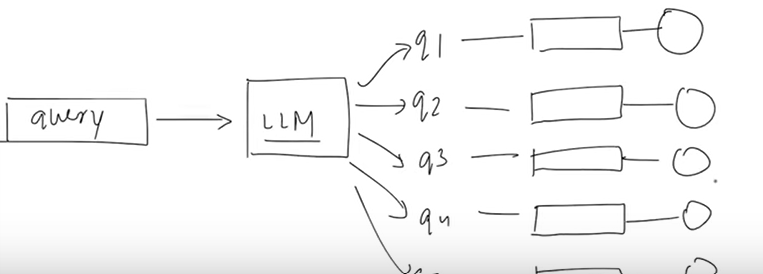

In [152]:
from langchain.retrievers.multi_query import MultiQueryRetriever

In [153]:
# Relevant health & wellness documents
all_docs = [
    Document(page_content="Regular walking boosts heart health and can reduce symptoms of depression.", metadata={"source": "H1"}),
    Document(page_content="Consuming leafy greens and fruits helps detox the body and improve longevity.", metadata={"source": "H2"}),
    Document(page_content="Deep sleep is crucial for cellular repair and emotional regulation.", metadata={"source": "H3"}),
    Document(page_content="Mindfulness and controlled breathing lower cortisol and improve mental clarity.", metadata={"source": "H4"}),
    Document(page_content="Drinking sufficient water throughout the day helps maintain metabolism and energy.", metadata={"source": "H5"}),
    Document(page_content="The solar energy system in modern homes helps balance electricity demand.", metadata={"source": "I1"}),
    Document(page_content="Python balances readability with power, making it a popular system design language.", metadata={"source": "I2"}),
    Document(page_content="Photosynthesis enables plants to produce energy by converting sunlight.", metadata={"source": "I3"}),
    Document(page_content="The 2022 FIFA World Cup was held in Qatar and drew global energy and excitement.", metadata={"source": "I4"}),
    Document(page_content="Black holes bend spacetime and store immense gravitational energy.", metadata={"source": "I5"}),
]

In [154]:
store = Chroma.from_documents(all_docs,embedding=embeds,collection_name='generic')
ret = store.as_retriever(search_type="similarity",search_kwargs={"k":4})
mul_ret = MultiQueryRetriever.from_llm(
    retriever=store.as_retriever(search_kwargs={"k":1}),
    llm = llm
)

In [155]:
q = "How to improve energy levels and maintain balance?"
ret.invoke(q)

[Document(metadata={'source': 'H5'}, page_content='Drinking sufficient water throughout the day helps maintain metabolism and energy.'),
 Document(metadata={'source': 'I1'}, page_content='The solar energy system in modern homes helps balance electricity demand.'),
 Document(metadata={'source': 'H2'}, page_content='Consuming leafy greens and fruits helps detox the body and improve longevity.'),
 Document(metadata={'source': 'H4'}, page_content='Mindfulness and controlled breathing lower cortisol and improve mental clarity.')]

In [156]:
mul_ret.invoke(q)

[Document(metadata={'source': 'I5'}, page_content='Black holes bend spacetime and store immense gravitational energy.'),
 Document(metadata={'source': 'H4'}, page_content='Mindfulness and controlled breathing lower cortisol and improve mental clarity.'),
 Document(metadata={'source': 'I1'}, page_content='The solar energy system in modern homes helps balance electricity demand.'),
 Document(metadata={'source': 'H5'}, page_content='Drinking sufficient water throughout the day helps maintain metabolism and energy.'),
 Document(metadata={'source': 'I2'}, page_content='Python balances readability with power, making it a popular system design language.')]

### Contextual Compressor Retriever
It is advanced one , it improves retrival quality by compressing documents after retrival - keep only relavant context based on query.

In [157]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever

In [158]:
from langchain.retrievers.document_compressors import LLMChainExtractor

In [159]:
# Recreate the document objects from the previous data
docs = [
    Document(page_content=(
        """The Grand Canyon is one of the most visited natural wonders in the world.
        Photosynthesis is the process by which green plants convert sunlight into energy.
        Millions of tourists travel to see it every year. The rocks date back millions of years."""
    ), metadata={"source": "Doc1"}),

    Document(page_content=(
        """In medieval Europe, castles were built primarily for defense.
        The chlorophyll in plant cells captures sunlight during photosynthesis.
        Knights wore armor made of metal. Siege weapons were often used to breach castle walls."""
    ), metadata={"source": "Doc2"}),

    Document(page_content=(
        """Basketball was invented by Dr. James Naismith in the late 19th century.
        It was originally played with a soccer ball and peach baskets. NBA is now a global league."""
    ), metadata={"source": "Doc3"}),

    Document(page_content=(
        """The history of cinema began in the late 1800s. Silent films were the earliest form.
        Thomas Edison was among the pioneers. Photosynthesis does not occur in animal cells.
        Modern filmmaking involves complex CGI and sound design."""
    ), metadata={"source": "Doc4"})
]

In [160]:
store = Chroma.from_documents(docs,embedding=embeds,collection_name="ccr_data")

In [161]:
base_retriever = store.as_retriever(search_kwargs={"k": 5})
compressor = LLMChainExtractor.from_llm(llm)

In [162]:
# Create the contextual compression retriever
compression_retriever = ContextualCompressionRetriever(
    base_retriever=base_retriever,
    base_compressor=compressor
)

In [163]:
# Query the retriever
query = "What is photosynthesis?"
compression_retriever.invoke(query)

[Document(metadata={'source': 'Doc1'}, page_content='Photosynthesis is the process by which green plants convert sunlight into energy.'),
 Document(metadata={'source': 'Doc2'}, page_content='The extracted relevant part of the context is:\n\nThe chlorophyll in plant cells captures sunlight during photosynthesis.')]

# RAG


**Definition**: RAG (Retrieval-Augmented Generation) is a method to enhance large language models (LLMs) by providing external context at query time, improving response accuracy.

**Significance**: RAG is one of the most common and useful applications in generative AI, addressing limitations of LLMs.

### Why is RAG Needed?
**LLM Basics:**
LLMs are transformer-based neural networks with billions of parameters (weights and biases).

They are pre-trained on massive datasets, storing knowledge as parametric knowledge in their parameters.

Larger models (e.g., 70B parameters) have more parametric knowledge than smaller ones (e.g., 7B).

Users access this knowledge by sending prompts, and LLMs generate responses word-by-word based on parametric knowledge.

**Limitations of LLMs:**
Private Data: LLMs cannot answer questions about private data (e.g., content from a specific website like learnwpsx.in) because it wasn’t included in their pre-training data.
Example: Asking ChatGPT about a specific video’s content on a private platform yields no answer.

Recent Data: LLMs have a knowledge cutoff date (e.g., January 1st). They cannot provide answers about events or data after this date unless connected to the internet (like ChatGPT).
Example: Asking about today’s news results in outdated or no response.

Hallucination: LLMs sometimes generate factually incorrect information confidently, a phenomenon called hallucination.
Example: An LLM might claim Einstein played football for Germany, which is entirely made-up.

**Solution 1: Fine-Tuning**
What is Fine-Tuning?
Fine-tuning involves retraining a pre-trained LLM on a smaller, domain-specific dataset to enhance its knowledge for specific tasks.

Analogy: A student with an engineering degree undergoes 2-3 months of company-specific training to learn job-specific skills. Similarly, fine-tuning trains LLMs for domain-specific tasks.

Example: Training an LLM on medical data to improve its ability to answer medical questions.

Types of Fine-Tuning:
Supervised Fine-Tuning:
Uses labeled datasets with prompt-output pairs (e.g., question-answer pairs).

The model learns to respond correctly to specific prompts.

Continued Pre-Training:
An unsupervised method where the model is trained on domain-specific data (e.g., lecture transcripts) without labels, similar to pre-training but on a smaller scale.

RLHF (Reinforcement Learning with Human Feedback):
Combines reinforcement learning and human feedback to teach the model how to behave in real-world scenarios.

LoRA/QLora: Parameter-efficient fine-tuning methods that freeze base weights and train only specific weights.

Fine-Tuning Process (Supervised):
Data Collection: Gather domain-specific labeled data (prompts and desired outputs).

Method Selection: Choose between full-parameter fine-tuning or parameter-efficient methods like LoRA.

Training: Train the model for a few epochs (computationally expensive).

Evaluation: Assess the model’s performance using metrics like exact match, factual accuracy, or hallucination rate.

How Fine-Tuning Solves the Three Problems:
Private Data: Training on private data adds it to the model’s parametric knowledge, enabling answers to private data queries.

Recent Data: Frequent fine-tuning with updated data ensures the model stays current, though this is computationally costly.

Hallucination: Training with examples of tricky prompts teaches the model to stick to facts or say “I don’t know,” reducing hallucinations.

**Problems with Fine-Tuning:**
Computationally Expensive: Training large models requires significant resources.

Technical Expertise: Requires skilled AI engineers or data scientists.

Frequent Updates: New or removed data (e.g., updated course catalogs) requires repeated fine-tuning, which is costly and complex.

Unsuitable for Dynamic Domains: In domains with rapidly changing data, fine-tuning becomes impractical.

**Solution 2: In-Context Learning**
Definition: In-context learning is an emergent property of large LLMs (e.g., GPT-3, Claude, LLaMA) where the model learns to solve tasks by seeing examples in the prompt without updating its weights.

Emergent Property: This ability was not explicitly programmed but appeared as LLMs scaled up in size and complexity (e.g., GPT-3 with 175B parameters).

Historical Context:
Early models (GPT-1, GPT-2) lacked in-context learning.

GPT-3 introduced this capability, as observed in the landmark paper “Language Models are Few-Shot Learners” (2020).

The paper highlighted that LLMs can learn tasks from a few examples, unlike humans who naturally excel at this.

How It Works:
Few-Shot Prompting: Provide examples in the prompt to teach the model how to perform a task.

Example (Sentiment Analysis):
Prompt: “Below are examples of text labeled with sentiment. Use them to determine the sentiment of the final text.”
Text 1: “I love this phone. It’s so smooth.” → Positive

Text 2: “This app crashes a lot.” → Negative

Text 3: “The camera is amazing.” → Positive

Final Text: “I hate the battery life.” → Model predicts: Negative

The model learns from examples and applies the learning to new inputs.

Other tasks: Named Entity Recognition, math problem-solving, or domain-specific tasks.

Enhancing In-Context Learning:
Instead of examples, provide the full context relevant to the query.

Example: For a lecture on linear regression, if a student asks about gradient descent, include the transcript segment (e.g., minutes 5-25) where gradient descent is explained.

This context-enhanced approach is RAG (Retrieval-Augmented Generation).

What is RAG? (Detailed Explanation)
Definition: RAG combines information retrieval (finding relevant data) and text generation (using LLMs to generate responses) to make LLMs smarter by providing external context at query time.

Key Idea: Inject external knowledge (context) into the prompt alongside the user’s query to enhance the LLM’s parametric knowledge.

Example Prompt:
“You are a helpful assistant. Answer the question only from the provided context [e.g., gradient descent transcript]. If the context is insufficient, say ‘I don’t know’ to avoid hallucination.”

Context: [Transcript of lecture segment]

Question: [User’s query about gradient descent]

**How RAG Works **(Four-Step Process)
**Indexing**:
Purpose: Create an external knowledge base to derive context for prompts.

Sub-Steps:
Document Ingestion:
Load source data (e.g., video transcripts, company documents) into memory.

Tools: LangChain’s document loaders (e.g., PDF loader, YouTube loader).

Text Chunking:
Split large documents into smaller, semantically meaningful chunks.

Reason: LLMs have token limits, and semantic search performs better on smaller chunks.

Tools: LangChain’s text splitters (e.g., Recursive Character Text Splitter, Semantic Chunker).

Embedding Generation:
Convert each chunk into dense vectors (embeddings) capturing semantic meaning.

Tools: Embedding models (e.g., OpenAI embeddings, Sentence Transformers).

Vector Storage:
Store embeddings and corresponding text chunks in a vector database.

Options: Local (FAISS, Chroma) or cloud-based (Pinecone, Weaviate, Milvus).

**Retrieval**:
Purpose: Find the most relevant chunks from the knowledge base based on the user’s query.

Sub-Steps:
Generate an embedding vector for the query using the same embedding model.

Perform a semantic search to find the closest vectors in the vector store.
Techniques: Simple similarity search, MMR (Maximum Marginal Relevance), or contextual compression.

Rank the retrieved vectors to identify the most relevant ones.

Fetch the corresponding text chunks to use as context.

Example: For a query about gradient descent, retrieve chunks discussing gradient descent (e.g., minutes 5-25 and 1:43-1:47 of a lecture).

**Augmentation**:
Purpose: Combine the user’s query and retrieved context to create a prompt.

Process: Design a prompt that includes:
Instructions (e.g., “Answer only from the provided context”).

Context (retrieved text chunks).

Query (user’s question).

Outcome: The prompt enhances the LLM’s knowledge with external context.

**Generation**:
Purpose: Use the LLM to generate a response based on the augmented prompt.

Process: The LLM combines its parametric knowledge with the provided context to produce an accurate, grounded response.

**How RAG Solves the Three Problems**
Private Data:
The external knowledge base is built from private data (e.g., company documents, lecture transcripts).

Context derived from this base ensures answers are based on private data, solving the issue.

Recent Data:
Add recent data (e.g., news articles, updates) to the knowledge base without retraining the model.

Unlike fine-tuning, which requires costly retraining, RAG only needs new documents to be indexed into the vector store, making it cheaper and faster.

Hallucination:
RAG grounds responses in the provided context, reducing the likelihood of hallucination.

Explicit instructions (e.g., “Say ‘I don’t know’ if context is insufficient”) ensure the model sticks to facts.



In [164]:
llm.invoke("Who has won more matches in this IPL 2025?")

AIMessage(content='I apologize, but since IPL 2025 has not taken place yet, there is no winner or data to share. The Indian Premier League (IPL) is an annual Twenty20 cricket league held in India, and the upcoming season will be IPL 2023.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 22, 'total_tokens': 77, 'completion_time': 0.045833333, 'prompt_time': 0.003180727, 'queue_time': 0.06751272600000001, 'total_time': 0.04901406}, 'model_name': 'Llama3-8b-8192', 'system_fingerprint': 'fp_179b0f92c9', 'finish_reason': 'stop', 'logprobs': None}, id='run--7fddfb71-b65f-4ae1-9516-2b5f74c33d57-0', usage_metadata={'input_tokens': 22, 'output_tokens': 55, 'total_tokens': 77})